# UV News Data Input

In [1]:
import pandas as pd
import numpy as np

true_path = r'C:\Users\tanuj\Downloads\News-_dataset\True.csv'
fake_path = r'C:\Users\tanuj\Downloads\News-_dataset\Fake.csv'

true_df = pd.read_csv(true_path)
fake_df = pd.read_csv(fake_path)

In [2]:
display(true_df)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"


In [3]:
display(fake_df)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"


# Most frequent words

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

true_df['combined_text'] = true_df['text'].astype(str) + ' ' + true_df['title'].astype(str) + ' ' + true_df['subject'].astype(str)

# Assuming your dataset has a 'text' column containing the text data
text_data = true_df['combined_text'].astype(str)

# Calculate TF-IDF scores
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(text_data)
feature_names = tfidf_vectorizer.get_feature_names_out()

# Get the most frequent scores
count_vectorizer = CountVectorizer(stop_words='english')
count_matrix = count_vectorizer.fit_transform(text_data)
word_frequencies = np.array(count_matrix.sum(axis=0))[0]

# Combine feature names, TF-IDF scores, and word frequencies into a DataFrame
result_df = pd.DataFrame({'Word': feature_names, 'TF-IDF': tfidf_matrix.sum(axis=0).A1, 'Frequency': word_frequencies})

# Sort the DataFrame by TF-IDF scores in descending order
result_df = result_df.sort_values(by='TF-IDF', ascending=False)

# Print the top 10 words and their corresponding TF-IDF scores and frequencies
print(result_df.head(50))


                 Word       TF-IDF  Frequency
61246           trump  1060.604841      60261
52283            said  1018.244991      99076
47054       president   461.885173      28698
28532           house   436.753376      18089
56977           state   392.912854      21691
50402      republican   365.722099      16879
25607      government   348.399935      19262
50813         reuters   346.076697      29112
42218           north   321.863276      10838
56992          states   320.841275      16811
62427          united   319.528491      15640
41408             new   317.943107      17792
33618           korea   308.396582       8175
52013          russia   304.101401       9041
13291         clinton   297.352022      10178
64402      washington   296.603340      13113
53718          senate   295.989992      10012
64918           white   292.524335      10374
12657           china   291.479675       9647
44617           party   287.734308      13111
59203             tax   283.937627

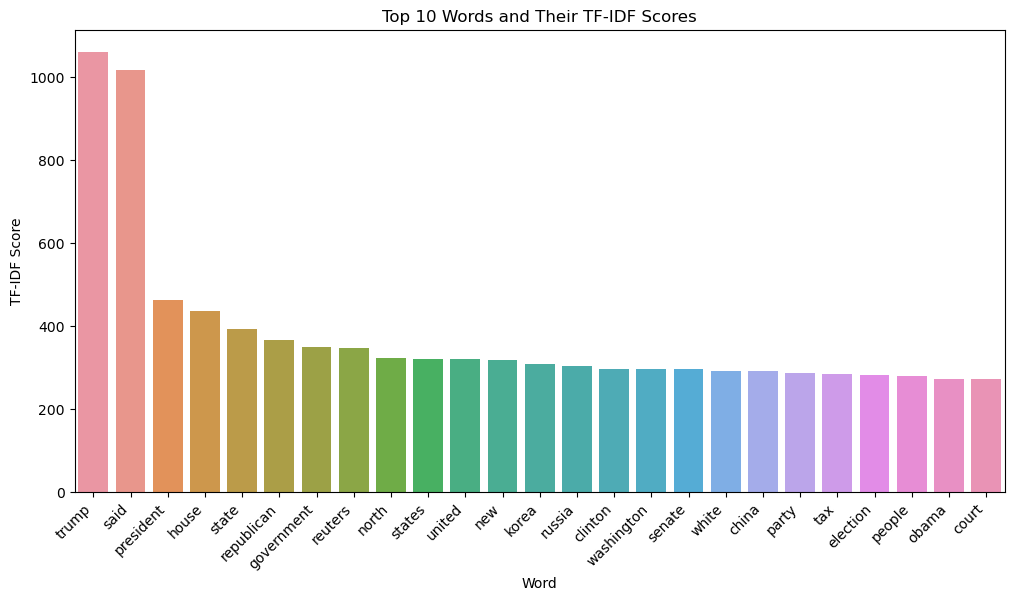

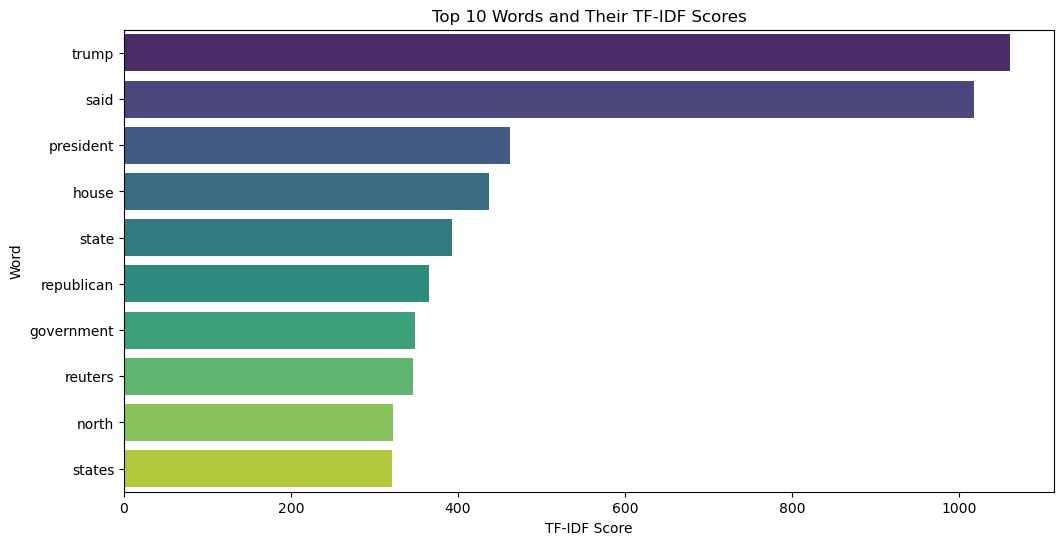

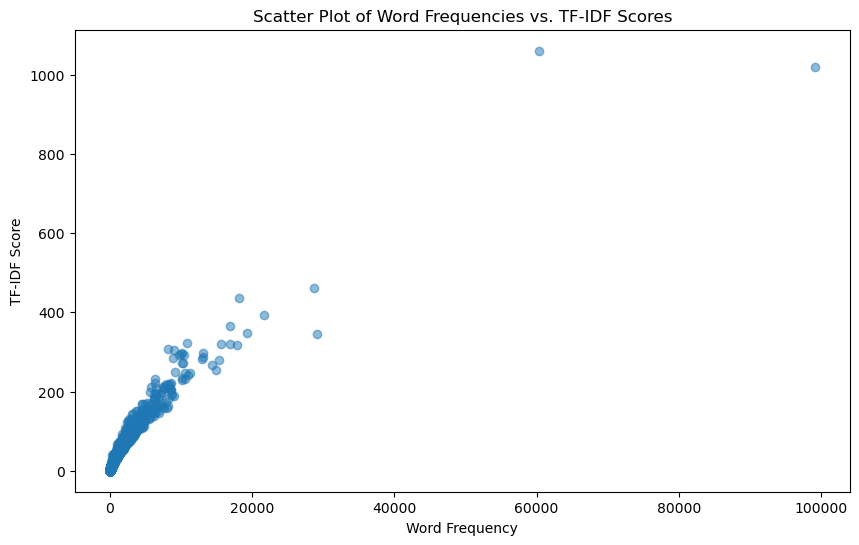

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(x='Word', y='TF-IDF', data=result_df.head(25))
plt.title('Top 10 Words and Their TF-IDF Scores')
plt.xlabel('Word')
plt.ylabel('TF-IDF Score')
plt.xticks(rotation=45, ha='right')
plt.show()

# Select the top 10 words
top_words_df = result_df.head(10)

# Plot the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='TF-IDF', y='Word', data=top_words_df, palette='viridis')
plt.title('Top 10 Words and Their TF-IDF Scores')
plt.xlabel('TF-IDF Score')
plt.ylabel('Word')
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(result_df['Frequency'], result_df['TF-IDF'], alpha=0.5)
plt.title('Scatter Plot of Word Frequencies vs. TF-IDF Scores')
plt.xlabel('Word Frequency')
plt.ylabel('TF-IDF Score')
plt.show()


In [6]:
fake_df['combined_text'] = fake_df['text'].astype(str) + ' ' + fake_df['title'].astype(str) + ' ' + fake_df['subject'].astype(str)

# Assuming your dataset has a 'text' column containing the text data
fake_text_data = fake_df['combined_text'].astype(str)

# Calculate TF-IDF scores
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(fake_text_data)
feature_names = tfidf_vectorizer.get_feature_names_out()

# Get the most frequent scores
count_vectorizer = CountVectorizer(stop_words='english')
count_matrix = count_vectorizer.fit_transform(fake_text_data)
word_frequencies = np.array(count_matrix.sum(axis=0))[0]

# Combine feature names, TF-IDF scores, and word frequencies into a DataFrame
fake_result_df = pd.DataFrame({'Word': feature_names, 'TF-IDF': tfidf_matrix.sum(axis=0).A1, 'Frequency': word_frequencies})

# Sort the DataFrame by TF-IDF scores in descending order
fake_result_df = fake_result_df.sort_values(by='TF-IDF', ascending=False)

# Print the top 10 words and their corresponding TF-IDF scores and frequencies
print(fake_result_df.head(50))


              Word       TF-IDF  Frequency
85781        trump  1437.541039      88638
66712    president   490.868400      28861
20390      clinton   484.011192      20311
60705        obama   481.506296      21379
73806         said   473.625924      33957
40660      hillary   448.197406      16441
89425        video   444.423728      16815
64112       people   417.096933      27085
59024         news   395.893043      30582
27968       donald   363.481689      18519
47051         just   339.620042      21920
51053         like   305.095177      18491
65745     politics   303.340307       9077
91441        white   302.225075      14064
79781        state   272.577351      13921
17516     campaign   269.084457      11573
58984          new   268.561776      15299
86461      twitter   264.208112      12105
41564        house   257.675785      11665
9357       america   253.289321      11888
50341         left   253.269373      10416
54648        media   247.868559      12406
84164      

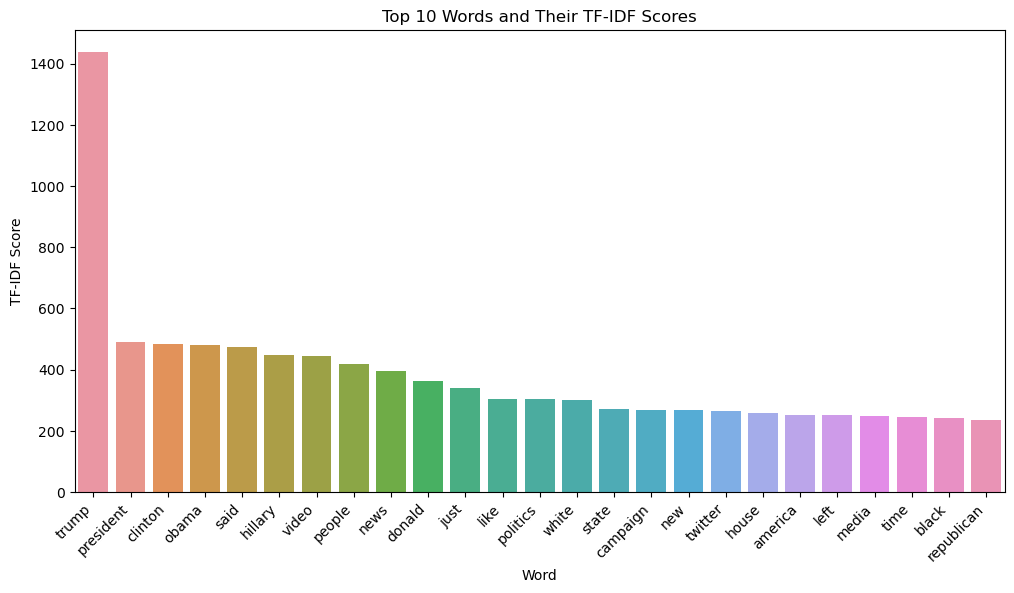

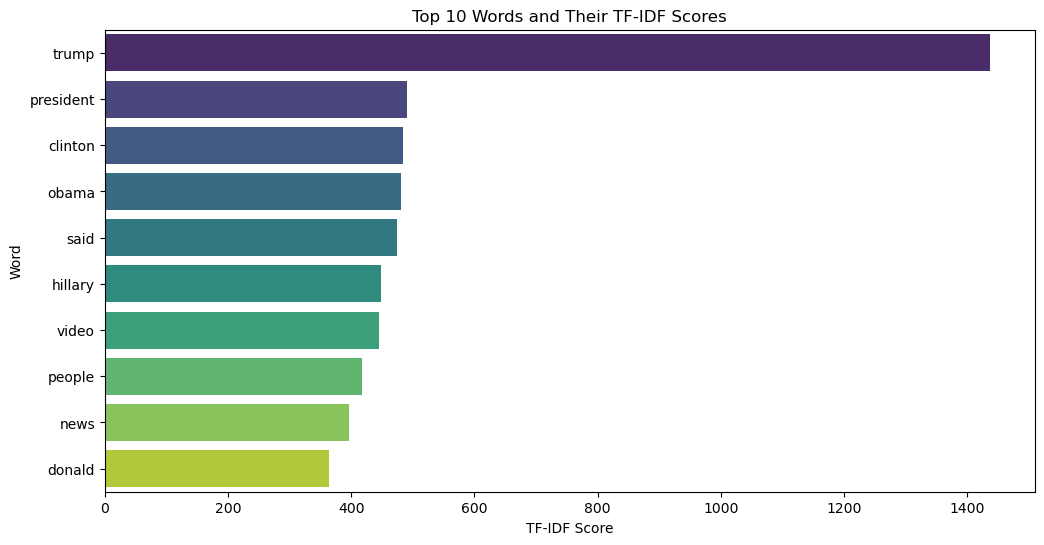

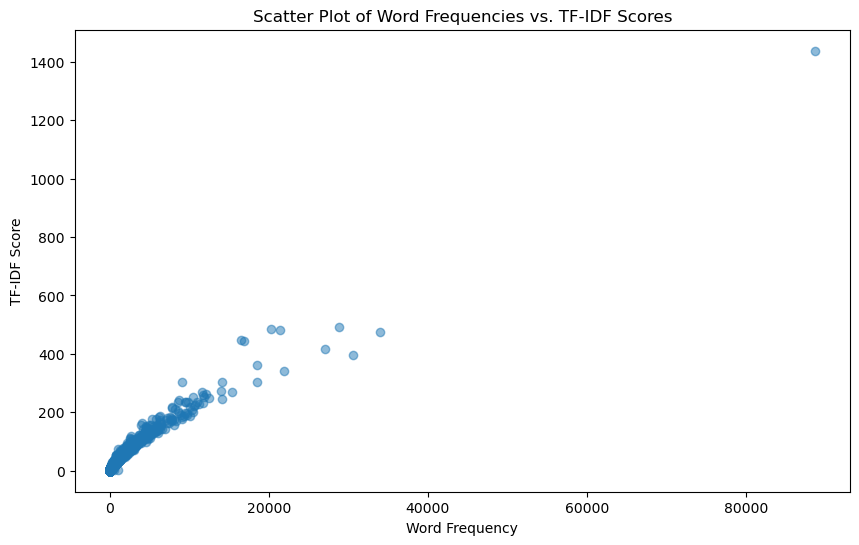

In [7]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Word', y='TF-IDF', data=fake_result_df.head(25))
plt.title('Top 10 Words and Their TF-IDF Scores')
plt.xlabel('Word')
plt.ylabel('TF-IDF Score')
plt.xticks(rotation=45, ha='right')
plt.show()

# Select the top 10 words
top_words = fake_result_df.head(10)

# Plot the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='TF-IDF', y='Word', data=top_words, palette='viridis')
plt.title('Top 10 Words and Their TF-IDF Scores')
plt.xlabel('TF-IDF Score')
plt.ylabel('Word')
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(fake_result_df['Frequency'], fake_result_df['TF-IDF'], alpha=0.5)
plt.title('Scatter Plot of Word Frequencies vs. TF-IDF Scores')
plt.xlabel('Word Frequency')
plt.ylabel('TF-IDF Score')
plt.show()


# Data Visulization

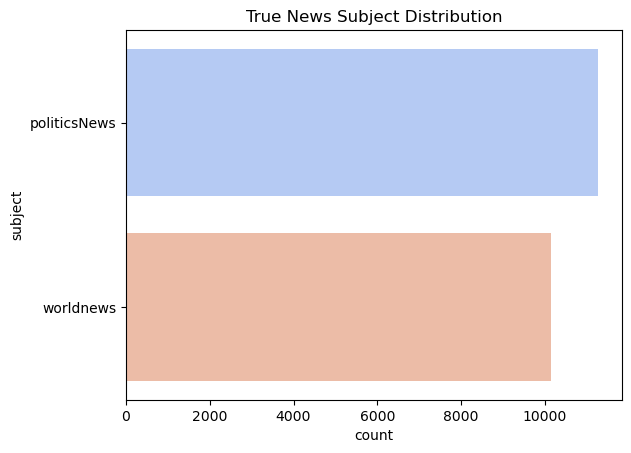

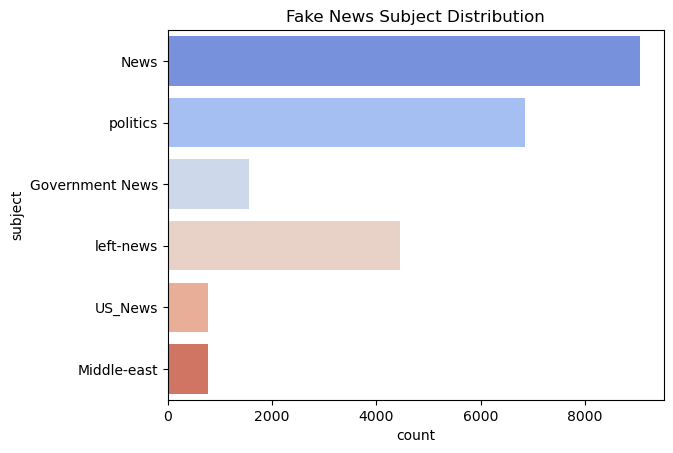

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(y="subject", palette="coolwarm", data=true_df).set_title('True News Subject Distribution')
plt.show()

sns.countplot(y="subject", palette="coolwarm", data=fake_df).set_title('Fake News Subject Distribution')
plt.show()

## Real News Word Cloud

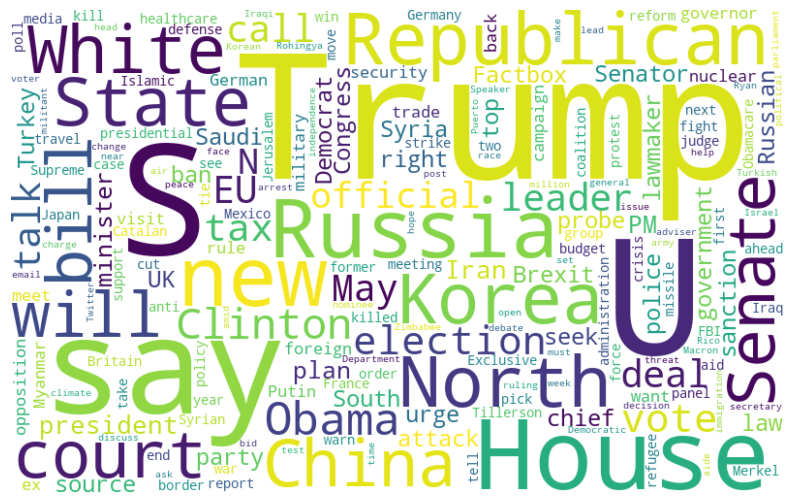

In [9]:
from wordcloud import WordCloud

real_titles = true_df.title
real_titles_ls = [text for text in real_titles]
# print(alls)
real_all_words = ' '.join(real_titles)
wordcloud_real = WordCloud(background_color='white',
    width= 800, height= 500,
    max_font_size = 180,
    collocations = False).generate(real_all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud_real, interpolation='bilinear')
plt.axis("off")
plt.show()

## Fake News Word Cloud

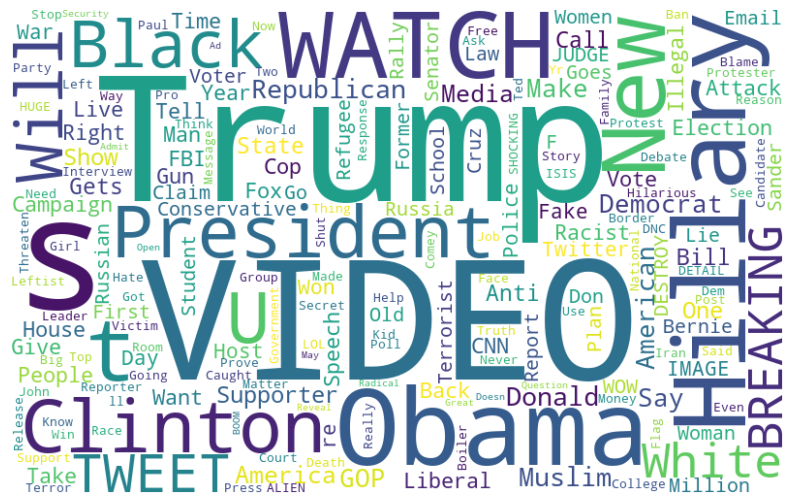

In [10]:
fake_titles = fake_df.title
fake_titles_ls = [text for text in fake_titles]
# print(alls)
fake_all_words = ' '.join(fake_titles)
wordcloud_fake = WordCloud(background_color='white',
    width= 800, height= 500,
    max_font_size = 180,
    collocations = False).generate(fake_all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud_fake, interpolation='bilinear')
plt.axis("off")
plt.show()

# Data Preprocessing

## Data Combination

In [11]:
# Add Labels to both df
true_df['true'] = 1
fake_df['true'] = 0

# Concat
df = pd.concat([true_df, fake_df])
display(df)

,title,text,subject,date,combined_text,true
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",WASHINGTON (Reuters) - The head of a conservat...,1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",WASHINGTON (Reuters) - Transgender people will...,1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",WASHINGTON (Reuters) - The special counsel inv...,1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",WASHINGTON (Reuters) - Trump campaign adviser ...,1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",SEATTLE/WASHINGTON (Reuters) - President Donal...,1
...,...,...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",21st Century Wire says As 21WIRE reported earl...,0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",21st Century Wire says It s a familiar theme. ...,0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",Patrick Henningsen 21st Century WireRemember ...,0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",21st Century Wire says Al Jazeera America will...,0


## Inspect Lengths of News

In [12]:
titles = [text for text in df.title]

max_len = 0
titles_len = []
for title in titles:
    titles_len.append(len(title.split()))
    max_len = max(len(title.split()), max_len)

print('Number of titles:', len(titles))
print('Max length of the titles:', max_len)
print('Mean length of the titles:', np.mean(titles_len))

Number of titles: 44898
Max length of the titles: 42
Mean length of the titles: 12.453472315025168


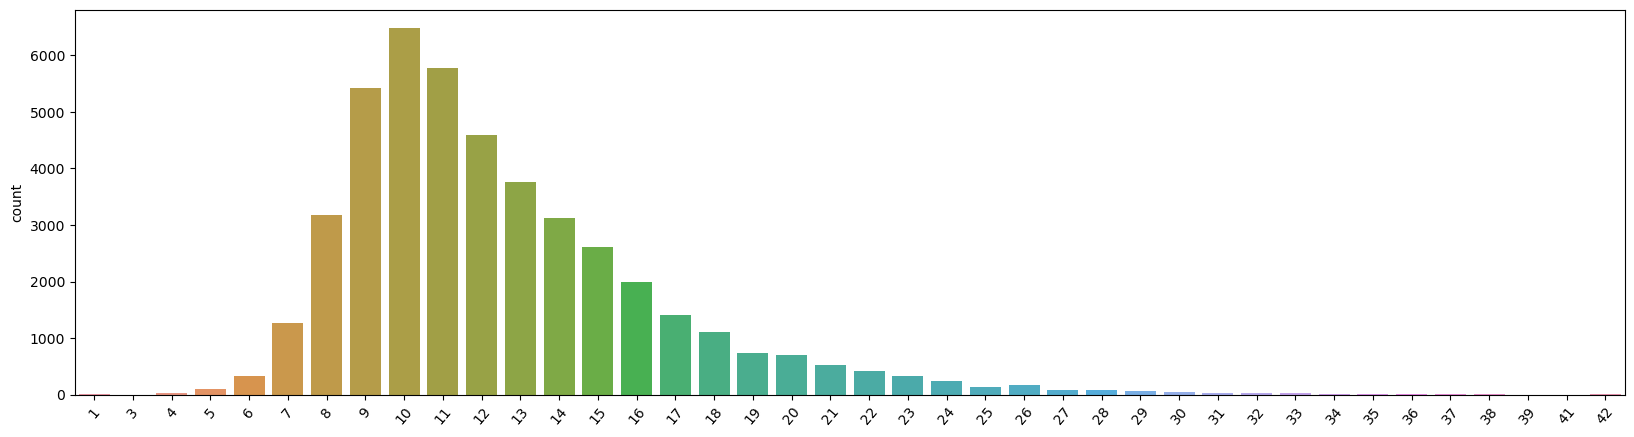

In [13]:
plt.figure(figsize=(20,5))
g = sns.countplot(x=titles_len)
g.set_xticklabels(g.get_xticklabels(), rotation=50)
plt.show()

In [14]:
texts = [text for text in df.text]

max_len = 0
texts_len = []
for text in texts:
    texts_len.append(len(text.split()))
    max_len = max(len(text.split()), max_len)

# g = sns.countplot(x=texts_len)
print('Mean length of the texts:', np.mean(texts_len))

Mean length of the texts: 405.28228428883244


## Purify & Shffle the DataFrame

In [15]:
from sklearn.utils import shuffle

# Purify
df = df.iloc[:,[0, -1]]

# Shuffle
df = shuffle(df).reset_index(drop=True)

display(df)

,title,true
0,Trump asks government agencies for plans to cu...,1
1,German SPD votes for talks with Merkel's conse...,1
2,Germany's Schaeuble warns Trump over protectio...,1
3,U.S. small businesses to lobby Congress to opp...,1
4,ABC News Suspend Anchor Brian Ross Over Fake N...,0
...,...,...
44893,Rescuers search for Philippine storm victims a...,1
44894,"Trump, Japan's Abe to spend time at Trump reso...",1
44895,Democrats set bills seeking to overturn Trump ...,1
44896,Vietnam finds misconduct in city that will hos...,1


## Split Data into Training, Validation, Test

In [16]:
train_val_df = df.sample(frac = 0.8)
test_df = df.drop(train_val_df.index)

train_df = train_val_df.sample(frac = 0.8)
val_df = train_val_df.drop(train_df.index)

# Reset Index
train_df = train_df.reset_index(drop=True)
val_df = val_df.reset_index(drop=True)
test_df = test_df.reset_index(drop=True)

print('trainset size:', train_df.shape)
print('valset size:', val_df.shape)
print('testset size:', test_df.shape)

trainset size: (28734, 2)
valset size: (7184, 2)
testset size: (8980, 2)


## Data distribution imbalanced

In [17]:
# train_imbalanced = 1/10
# val_imbalanced = 1/10
# test_imbalanced = 1/10

# train_true = train_df[train_df['true'] == 1]
# train_fake = train_df[train_df['true'] == 0]
# train_fake = train_fake.iloc[:round(len(train_fake)*train_imbalanced),:]
# train_true_len = len(train_true)
# train_fake_len = len(train_fake)
# train_df = pd.concat([train_true, train_fake])

# val_true = val_df[val_df['true'] == 1]
# val_fake = val_df[val_df['true'] == 0]
# val_fake = val_fake.iloc[:round(len(val_fake)*val_imbalanced),:]
# val_true_len = len(val_true)
# val_fake_len = len(val_fake)
# val_df = pd.concat([val_true, val_fake])

# test_true = test_df[test_df['true'] == 1]
# test_fake = test_df[test_df['true'] == 0]
# test_fake = test_fake.iloc[:round(len(test_fake)*test_imbalanced),:]
# test_true_len = len(test_true)
# test_fake_len = len(test_fake)
# test_df = pd.concat([test_true, test_fake])

# len_df = pd.DataFrame({'ind': ['Train', 'Validation', 'Test'], 'True': [train_true_len, val_true_len, test_true_len], 'Fake': [train_fake_len, val_fake_len, test_fake_len]})
# len_df.set_index('ind', inplace=True)
# len_df.index.name = None

# len_df

## Dataframe to csv

In [18]:
train_df.to_csv('train.tsv', sep='\t', index=False)
val_df.to_csv('val.tsv', sep='\t', index=False)
test_df.to_csv('test.tsv', sep='\t', index=False)

## Concatenate all dataframe

In [19]:
df = pd.concat([train_df, val_df, test_df])
df

,title,true
0,Campaigning in style: How Jeb Bush blew throug...,1
1,North Carolina Tea Partiers Just ADMITTED The...,0
2,Carrier Workers BLAST Trump: ‘He Lied His Ass...,0
3,"Trump health pick defends stocks, says America...",1
4,President Trump’s Moving Pentagon Speech and C...,0
...,...,...
8975,Joe Biden Is Downright Ruthless When Rich ‘A*...,0
8976,Israel: No peace talks with Palestinian govern...,1
8977,TREASON! HOW OBAMA’S SHADOW GOVERNMENT Is Comm...,0
8978,"In Syria, Russia securing position as Assad pr...",1


## Performing Data Cleaning

In [20]:
import nltk
# Downloading Stopwords
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tanuj\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [21]:
# Obtaining Additional Stopwords From nltk
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

In [22]:
# Removing Stopwords And Remove Words With 2 Or Less Characters
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3 and token not in stop_words:
            result.append(token)
            
    return result

In [23]:
import gensim

# Applying The Function To The Dataframe
df['clean'] = df['title'].apply(preprocess)

## Obtaining The Total Words Present In The Dataset

In [24]:
list_of_words = []
for i in df.clean:
    for j in i:
        list_of_words.append(j)

total_words = len(list(set(list_of_words)))
total_words

19174

## Preparing The Data By Performing Tokenization And Padding

In [25]:
from nltk import word_tokenize
import tensorflow 


In [26]:
from tensorflow.keras.preprocessing.text import one_hot, Tokenizer

# Creating A Tokenizer To Tokenize The Words And Create Sequences Of Tokenized Words
tokenizer = Tokenizer(num_words = total_words)
tokenizer.fit_on_texts(train_df['title'])

train_sequences = tokenizer.texts_to_sequences(train_df['title'])
val_sequences = tokenizer.texts_to_sequences(val_df['title'])
test_sequences = tokenizer.texts_to_sequences(test_df['title'])

In [27]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Adding Padding
padded_train = pad_sequences(train_sequences,maxlen = 42, padding = 'post', truncating = 'post')
padded_val = pad_sequences(val_sequences,maxlen = 42, padding = 'post', truncating = 'post')
padded_test = pad_sequences(test_sequences,maxlen = 42, padding = 'post', truncating = 'post')

# LSTM

## Building And Training LSTM Model

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Embedding, Input, LSTM, Conv1D, MaxPool1D, Bidirectional, Dropout, BatchNormalization

## Creating model Using LSTM
embedding_vector_features=40
model=Sequential()
model.add(Embedding(total_words,embedding_vector_features,input_length=42))
model.add(Dropout(0.3))
model.add(LSTM(100))
model.add(Dropout(0.3))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 42, 40)            766960    
                                                                 
 dropout (Dropout)           (None, 42, 40)            0         
                                                                 
 lstm (LSTM)                 (None, 100)               56400     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 823,461
Trainable params: 823,461
Non-trainable params: 0
_________________________________________________________________
None


In [29]:
y_train = np.asarray(train_df['true'])
y_val = np.asarray(val_df['true'])

# Training the model
model.fit(padded_train, y_train, batch_size = 64, validation_data=(padded_val, y_val), epochs = 3)

Epoch 1/3
449/449 [==============================] - 14s 27ms/step - loss: 0.2218 - accuracy: 0.8862 - val_loss: 0.0867 - val_accuracy: 0.9701
Epoch 2/3
449/449 [==============================] - 12s 26ms/step - loss: 0.0584 - accuracy: 0.9802 - val_loss: 0.0871 - val_accuracy: 0.9723
Epoch 3/3
449/449 [==============================] - 12s 27ms/step - loss: 0.0346 - accuracy: 0.9896 - val_loss: 0.1188 - val_accuracy: 0.9691


## Assessing Trained Model Performance

281/281 [==============================] - 2s 6ms/step
LSTM Model Accuracy :  0.9683741648106904
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      4749
           1       0.97      0.96      0.97      4231

    accuracy                           0.97      8980
   macro avg       0.97      0.97      0.97      8980
weighted avg       0.97      0.97      0.97      8980



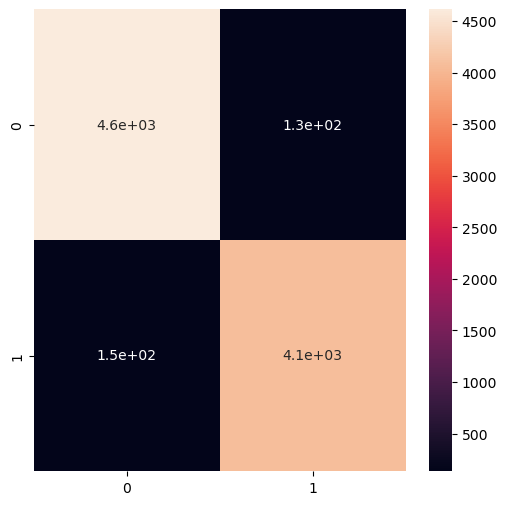

In [30]:
# Making prediction
#prediction = model.predict(padded_test)

# Getting The Accuracy
#from sklearn.metrics import accuracy_score
#y_test = np.asarray(test_df['true'])

#accuracy = accuracy_score(list(y_test), prediction)

#print("LSTM Model Accuracy : ", accuracy)


# Making predictions
predictions = model.predict(padded_test)

# Assuming you want to use a threshold of 0.5 for binary classification
# You can adjust this threshold based on your specific problem
threshold = 0.5
predicted_classes = (predictions > threshold).astype(int)

# Getting the Accuracy
from sklearn.metrics import accuracy_score

y_test = np.asarray(test_df['true'])
accuracy = accuracy_score(y_test, predicted_classes)
print("LSTM Model Accuracy : ", accuracy)


# Getting The Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(list(y_test), predicted_classes)
plt.figure(figsize = (6, 6))
sns.heatmap(cm, annot = True)

from sklearn.metrics import classification_report
print(classification_report(y_test, predicted_classes))

# Bidirectional LSTM

## Building And Training Bidirectional LSTM Model

In [31]:
## Creating model Using LSTM
embedding_vector_features=40
model=Sequential()
model.add(Embedding(total_words,embedding_vector_features,input_length=42))
model.add(Dropout(0.3))
model.add(Bidirectional(LSTM(100)))
model.add(Dropout(0.3))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 42, 40)            766960    
                                                                 
 dropout_2 (Dropout)         (None, 42, 40)            0         
                                                                 
 bidirectional (Bidirectiona  (None, 200)              112800    
 l)                                                              
                                                                 
 dropout_3 (Dropout)         (None, 200)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 201       
                                                                 
Total params: 879,961
Trainable params: 879,961
Non-trainable params: 0
________________________________________________

In [32]:
y_train = np.asarray(train_df['true'])
y_val = np.asarray(val_df['true'])

# Training the model
model.fit(padded_train, y_train, batch_size = 64, validation_data=(padded_val, y_val), epochs = 3)

Epoch 1/3
449/449 [==============================] - 25s 48ms/step - loss: 0.1801 - accuracy: 0.9223 - val_loss: 0.0801 - val_accuracy: 0.9708
Epoch 2/3
449/449 [==============================] - 22s 49ms/step - loss: 0.0501 - accuracy: 0.9840 - val_loss: 0.0723 - val_accuracy: 0.9740
Epoch 3/3
449/449 [==============================] - 22s 49ms/step - loss: 0.0259 - accuracy: 0.9913 - val_loss: 0.0958 - val_accuracy: 0.9701


## Assessing Trained Model Performance

281/281 [==============================] - 4s 10ms/step
Bidirectional LSTM Model Accuracy :  0.9683741648106904
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      4749
           1       0.97      0.96      0.97      4231

    accuracy                           0.97      8980
   macro avg       0.97      0.97      0.97      8980
weighted avg       0.97      0.97      0.97      8980



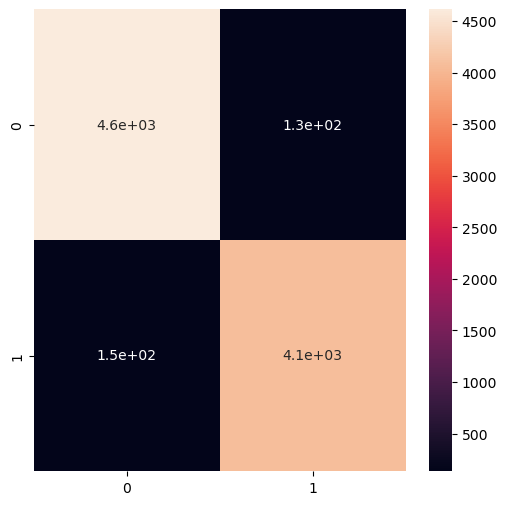

In [33]:
# Making prediction
prediction = model.predict(padded_test)

threshold = 0.5
predicted_classes = (predictions > threshold).astype(int)

# Getting The Accuracy
y_test = np.asarray(test_df['true'])

accuracy = accuracy_score(list(y_test), predicted_classes)

print("Bidirectional LSTM Model Accuracy : ", accuracy)


# Getting The Confusion Matrix
cm = confusion_matrix(list(y_test), predicted_classes)
plt.figure(figsize = (6, 6))
sns.heatmap(cm, annot = True)

print(classification_report(y_test, predicted_classes))

# CNN-BiLSTM

## Building And Training CNN Model

In [34]:
## Creating model Using CNN
embedding_vector_features=40
model=Sequential()
model.add(Embedding(total_words,embedding_vector_features,input_length=42))

model.add(Dropout(0.3))

model.add(Conv1D(32, 5, activation='relu'))
model.add(MaxPool1D())

model.add(Conv1D(32, 5, activation='relu'))
model.add(MaxPool1D())

model.add(Bidirectional(LSTM(100)))
model.add(Dropout(0.3))

model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 42, 40)            766960    
                                                                 
 dropout_4 (Dropout)         (None, 42, 40)            0         
                                                                 
 conv1d (Conv1D)             (None, 38, 32)            6432      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 19, 32)           0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 15, 32)            5152      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 7, 32)            0         
 1D)                                                  

In [35]:
y_train = np.asarray(train_df['true'])
y_val = np.asarray(val_df['true'])

# Training the model
model.fit(padded_train, y_train, batch_size = 64, validation_data=(padded_val, y_val), epochs = 3)

Epoch 1/3
449/449 [==============================] - 12s 18ms/step - loss: 0.1750 - accuracy: 0.9222 - val_loss: 0.0763 - val_accuracy: 0.9716
Epoch 2/3
449/449 [==============================] - 7s 17ms/step - loss: 0.0440 - accuracy: 0.9847 - val_loss: 0.0897 - val_accuracy: 0.9719
Epoch 3/3
449/449 [==============================] - 7s 16ms/step - loss: 0.0173 - accuracy: 0.9940 - val_loss: 0.0795 - val_accuracy: 0.9734


## Assessing Trained Model Performance

281/281 [==============================] - 2s 3ms/step
CNN Model Accuracy :  0.9683741648106904
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      4749
           1       0.97      0.96      0.97      4231

    accuracy                           0.97      8980
   macro avg       0.97      0.97      0.97      8980
weighted avg       0.97      0.97      0.97      8980



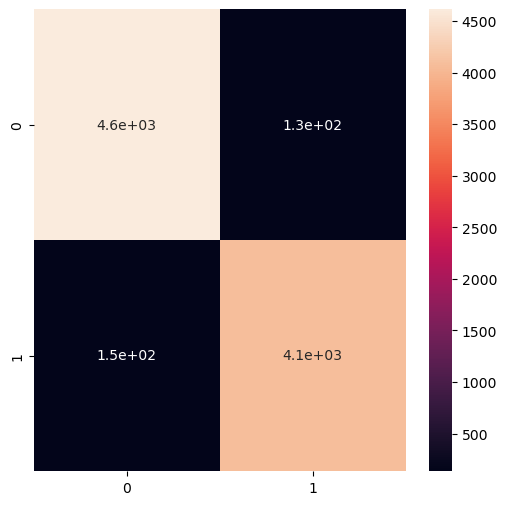

In [36]:
# Making prediction
prediction = model.predict(padded_test)

threshold = 0.5
predicted_classes = (predictions > threshold).astype(int)


# Getting The Accuracy
y_test = np.asarray(test_df['true'])

accuracy = accuracy_score(list(y_test), predicted_classes)

print("CNN Model Accuracy : ", accuracy)


# Getting The Confusion Matrix
cm = confusion_matrix(list(y_test), predicted_classes)
plt.figure(figsize = (6, 6))
sns.heatmap(cm, annot = True)

print(classification_report(y_test, predicted_classes))

# BERT

In [37]:


import torch
from transformers import BertTokenizer

In [38]:
PRETRAINED_MODEL_NAME = 'bert-base-uncased'
tokenizer = BertTokenizer.from_pretrained(PRETRAINED_MODEL_NAME)

## Load Dataset Class

In [39]:
from torch.utils.data import Dataset

class FakeNewsDataset(Dataset):
    def __init__(self, mode, tokenizer):
        assert mode in ['train', 'val', 'test']
        self.mode = mode
        self.df = pd.read_csv(mode + '.tsv', sep='\t').fillna("")
        self.len = len(self.df)
        self.tokenizer = tokenizer  # BERT tokenizer
    

    def __getitem__(self, idx):
        if self.mode == 'test':
            statement, label = self.df.iloc[idx, :].values
            label_tensor = torch.tensor(label)
        else:
            statement, label = self.df.iloc[idx, :].values
            label_tensor = torch.tensor(label)

        word_pieces = ['[CLS]']
        statement = self.tokenizer.tokenize(statement)
        word_pieces += statement + ['[SEP]']
        len_st = len(word_pieces)
        

        ids = self.tokenizer.convert_tokens_to_ids(word_pieces)
        tokens_tensor = torch.tensor(ids)

        segments_tensor = torch.tensor([0] * len_st, dtype=torch.long)
        
        return (tokens_tensor, segments_tensor, label_tensor)
    
    def __len__(self):
        return self.len
    
    
# Initialize Datasets for Transformation
trainset = FakeNewsDataset('train', tokenizer=tokenizer)
valset = FakeNewsDataset('val', tokenizer=tokenizer)
testset = FakeNewsDataset('test', tokenizer=tokenizer)

print('trainset size:' ,trainset.__len__())
print('valset size:',valset.__len__())
print('testset size: ',testset.__len__())

trainset size: 28734
valset size: 7184
testset size:  8980


## Sampling and Observing Tensors

In [40]:

sample_idx = 0


statement, label = trainset.df.iloc[sample_idx].values


tokens_tensor, segments_tensor, label_tensor = trainset[sample_idx]

tokens = tokenizer.convert_ids_to_tokens(tokens_tensor.tolist())
combined_text = " ".join(tokens)


print(f"""
original_statement: 
{statement}

tokens: 
{tokens}

label: {label}

--------------------

tokens_tensor: 
{tokens_tensor}

segments_tensor: 
{segments_tensor}

label_tensor: 
{label_tensor}

""")


original_statement: 
Campaigning in style: How Jeb Bush blew through his war chest 

tokens: 
['[CLS]', 'campaigning', 'in', 'style', ':', 'how', 'je', '##b', 'bush', 'blew', 'through', 'his', 'war', 'chest', '[SEP]']

label: 1

--------------------

tokens_tensor: 
tensor([  101, 18524,  1999,  2806,  1024,  2129, 15333,  2497,  5747,  8682,
         2083,  2010,  2162,  3108,   102])

segments_tensor: 
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

label_tensor: 
1




## Reforming the Dataset to Fit the Model

In [41]:
from torch.utils.data import DataLoader
from torch.nn.utils.rnn import pad_sequence


def create_mini_batch(samples):
    tokens_tensors = [s[0] for s in samples]
    segments_tensors = [s[1] for s in samples]
    

    if samples[0][2] is not None:
        label_ids = torch.stack([s[2] for s in samples])
    else:
        label_ids = None
    
    # Zero Padding
    tokens_tensors = pad_sequence(tokens_tensors, batch_first=True)
    segments_tensors = pad_sequence(segments_tensors, batch_first=True)
    

    masks_tensors = torch.zeros(tokens_tensors.shape, dtype=torch.long)
    masks_tensors = masks_tensors.masked_fill(tokens_tensors != 0, 1)
    
    return tokens_tensors, segments_tensors, masks_tensors, label_ids



BATCH_SIZE = 16
trainloader = DataLoader(trainset, batch_size=BATCH_SIZE, collate_fn=create_mini_batch)
valloader = DataLoader(valset, batch_size=BATCH_SIZE, collate_fn=create_mini_batch)
testloader = DataLoader(testset, batch_size=BATCH_SIZE,collate_fn=create_mini_batch)

In [42]:
data = next(iter(trainloader))

tokens_tensors, segments_tensors, masks_tensors, label_ids = data

print(f"""
tokens_tensors.shape   = {tokens_tensors.shape} 
{tokens_tensors}
------------------------
segments_tensors.shape = {segments_tensors.shape}
{segments_tensors}
------------------------
masks_tensors.shape    = {masks_tensors.shape}
{masks_tensors}
------------------------
label_ids.shape        = {label_ids.shape}
{label_ids}
""")


tokens_tensors.shape   = torch.Size([16, 35]) 
tensor([[  101, 18524,  1999,  2806,  1024,  2129, 15333,  2497,  5747,  8682,
          2083,  2010,  2162,  3108,   102,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0],
        [  101,  2167,  3792,  5572,  2112, 10136,  2074,  4914,  2027,  2024,
          1996,  2995, 15554,  1025,  8398,  3447,  2515,  2498,   102,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0],
        [  101,  6839,  3667,  8479,  8398,  1024,  1520,  2002,  9828,  2010,
          4632,  2125,  1521,   102,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0],
        [  101,  8398,  2740,  4060,  6985,  2015, 15768,  1010,  2758,  4841,
          2180,  1005,  105

## Model Construction

In [43]:
from transformers import BertForSequenceClassification
from IPython.display import display, clear_output

PRETRAINED_MODEL_NAME = "bert-base-uncased"
NUM_LABELS = 2

model = BertForSequenceClassification.from_pretrained(
    PRETRAINED_MODEL_NAME, num_labels=NUM_LABELS)

clear_output()


print("""
name             module
-----------------------""")
for name, module in model.named_children():
    if name == "bert":
        for n, _ in module.named_children():
            print(f"{name}:{n}")
    else:
        print("{:16} {}".format(name, module))


name             module
-----------------------
bert:embeddings
bert:encoder
bert:pooler
dropout          Dropout(p=0.1, inplace=False)
classifier       Linear(in_features=768, out_features=2, bias=True)


In [44]:
model.config

BertConfig {
  "_name_or_path": "bert-base-uncased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.34.0",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}

# Fine-Tuning of BERT

In [45]:

from sklearn.metrics import accuracy_score
from tqdm.notebook import tqdm

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# print("device:", device)
 model = model.to(device)

model.train()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-5)
NUM_EPOCHS = 3

for epoch in range(NUM_EPOCHS):
    train_loss = 0.0
    train_acc = 0.0

    loop = tqdm(trainloader)
     for batch_idx, data in enumerate(loop):
        tokens_tensors, segments_tensors, masks_tensors, labels = [t.to(device) for t in data]


        optimizer.zero_grad()
        
        outputs = model(input_ids=tokens_tensors, 
                         token_type_ids=segments_tensors, 
                         attention_mask=masks_tensors, 
                         labels=labels)

        loss = outputs[0]
        loss.backward()
        optimizer.step()

        logits = outputs[1]
        _, pred = torch.max(logits.data, 1)
        train_acc = accuracy_score(pred.cpu().tolist() , labels.cpu().tolist())


        train_loss += loss.item()

        if batch_idx == len(trainloader)-1:
            _, acc = get_predictions(model, trainloader, compute_acc=True)

        loop.set_description(f"Epoch [{epoch+1}/{NUM_EPOCHS}]")
        loop.set_postfix(acc = train_acc, loss = train_loss)

## Save Model

In [46]:
torch.save(model, './best_model.pth')
print('Model saved!')

Model saved!


## Load Model

In [47]:
model = torch.load('./best_model.pth')
model = model.to(device)

# Test

[[0.51762361 0.07886435]
 [0.48237639 0.92113565]]
Acc:  0.5603563474387527


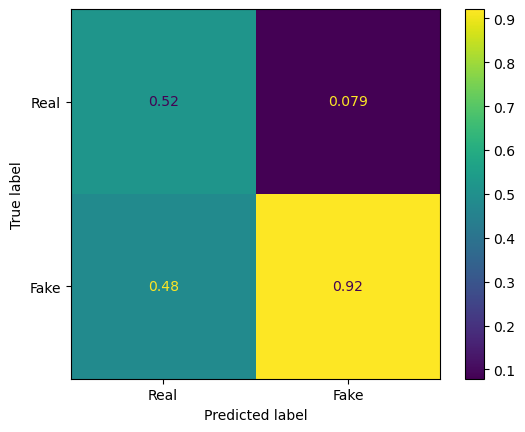

In [48]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

true=[]
predictions=[]
with torch.no_grad():
    model.eval()
    for data in testloader:
        if next(model.parameters()).is_cuda:
            data = [t.to(device) for t in data if t is not None]
            
        tokens_tensors, segments_tensors, masks_tensors = data[:3]
        test_outputs = model(input_ids=tokens_tensors, 
                    token_type_ids=segments_tensors, 
                    attention_mask=masks_tensors)

        logits = test_outputs[0]
        _, pred = torch.max(logits.data, 1)

        labels = data[3]
        true.extend(labels.cpu().tolist())
        predictions.extend(pred.cpu().tolist())


cm = confusion_matrix(true, predictions, labels=[1, 0], normalize='pred')
print(cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Real', 'Fake'])
disp.plot()

print('Acc: ', accuracy_score(predictions,true))

In [49]:
df = pd.DataFrame({"pred_label": predictions})

df_pred = pd.concat([testset.df.loc[:, ['title']], 
                          testset.df.loc[:, ['true']], 
                          df.loc[:, 'pred_label']], axis=1)
# df_pred.to_csv('bert_1_prec_training_samples.csv', index=False)
df_pred

,title,true,pred_label
0,STUCK ON STUPID: While Liberals Trash Melania ...,0,1
1,House oversight panel chair: Sessions should '...,1,1
2,Timeline: Zika's origin and global spread,1,1
3,"More than 180,000 people, mostly Kurds, displa...",1,1
4,Fox CEO Desperately Begs Donald Trump’s Wife ...,0,1
...,...,...,...
8975,Joe Biden Is Downright Ruthless When Rich ‘A*...,0,1
8976,Israel: No peace talks with Palestinian govern...,1,1
8977,TREASON! HOW OBAMA’S SHADOW GOVERNMENT Is Comm...,0,1
8978,"In Syria, Russia securing position as Assad pr...",1,1


In [50]:
print(classification_report(df_pred.true, df_pred.pred_label))

              precision    recall  f1-score   support

           0       0.92      0.18      0.31      4749
           1       0.52      0.98      0.68      4231

    accuracy                           0.56      8980
   macro avg       0.72      0.58      0.49      8980
weighted avg       0.73      0.56      0.48      8980



## Insight on Wrong Classification

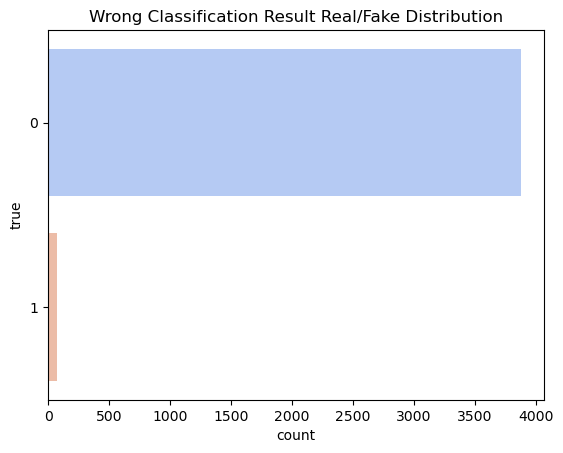

In [51]:
wrong_df = df_pred[df_pred.true != df_pred.pred_label]
sns.countplot(y="true", palette="coolwarm", data=wrong_df).set_title('Wrong Classification Result Real/Fake Distribution')
plt.show()

In [52]:
wrong_titles = df_pred[df_pred.true != df_pred.pred_label].title.values
wrong_titles

array(['STUCK ON STUPID: While Liberals Trash Melania Trump…Shouldn’t We Be More Concerned With THIS BIT FROM OBAMA? [Video]',
       ' Fox CEO Desperately Begs Donald Trump’s Wife And Daughter To Get Him Back In Debate (TWEET)',
       'OPEN SOCIETY: Soros-backed, Anti-Trump Immigration Protests ‘Sprung from Nowhere’ at Airports Across America',
       ...,
       ' Joe Biden Is Downright Ruthless When Rich ‘A**hole’ Callously Disrespects His Dead Son',
       'TREASON! HOW OBAMA’S SHADOW GOVERNMENT Is Commanding An Army Of Anti-Trump Agitators To Sabotage President Trump #WAR [VIDEO]',
       "Iran says Saudi Arabia facing results of its 'wars of aggression'"],
      dtype=object)